In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

data = iris.data[:, [2,3]]
target = iris.target

データ分割

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

In [12]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

train acc: 0.6952380952380952
test acc: 0.6
train acc: 0.9428571428571428
test acc: 0.9555555555555556
train acc: 0.9523809523809523
test acc: 0.9555555555555556
train acc: 0.9523809523809523
test acc: 0.9777777777777777
train acc: 0.9523809523809523
test acc: 0.9777777777777777
train acc: 0.9619047619047619
test acc: 0.9777777777777777
train acc: 0.9619047619047619
test acc: 0.9777777777777777


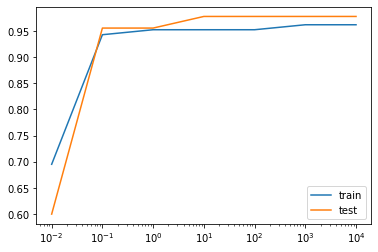

In [35]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

C = [0.01,0.1,1,10,100,1000,10000]

train_accs = []
test_accs = []

# run Logistic Regression with various Cs
for c in C:
    lr = LogisticRegression(C=c, random_state=0)
    lr.fit(X_train_std, y_train)
    train_pred = lr.predict(X_train_std)
    train_ac = np.sum(y_train==train_pred)/len(train_pred)

    test_pred = lr.predict(X_test_std)
    test_ac = np.sum(y_test==test_pred)/len(test_pred)

    print("train acc:", train_ac)
    print("test acc:", test_ac)
    train_accs.append(train_ac)
    test_accs.append(test_ac)

plt.plot(C, train_accs, label="train")
plt.plot(C, test_accs, label="test")
plt.xscale("log")
plt.legend()
